In [1]:
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeo

In [2]:
gsom = pd.read_csv('../data/stations_list.csv')

In [3]:
gsom

datacoverage  elevation elevationUnit                 id  latitude  \
0        0.9996       39.6        METERS  GHCND:USW00094728   40.7889   
1        0.9999        3.4        METERS  GHCND:USW00014732   40.7792   
2        0.8741        3.4        METERS  GHCND:USW00094789   40.6386   

   longitude  maxdate     mindate                              name  
0   -73.9669  7/14/17  1869-01-01       NY CITY CENTRAL PARK, NY US  
1   -73.8800  7/16/17     10/7/39         LA GUARDIA AIRPORT, NY US  
2   -73.7622  7/16/17     7/17/48  JFK INTERNATIONAL AIRPORT, NY US

In [3]:
gsom.merge?

In [4]:
gsom['geometry'] = gsom.apply(lambda row: 
                              sgeo.Point(row['longitude'], 
                                         row['latitude']), axis=1)

In [5]:
gsom  = gsom.drop(['latitude', 'longitude'], axis=1)

In [6]:
crs = {'init': 'epsg:4326'}
gg = gpd.GeoDataFrame(gsom, crs=crs)

In [7]:
gg

datacoverage  elevation elevationUnit                 id  maxdate  \
0        0.9996       39.6        METERS  GHCND:USW00094728  7/14/17   
1        0.9999        3.4        METERS  GHCND:USW00014732  7/16/17   
2        0.8741        3.4        METERS  GHCND:USW00094789  7/16/17   

      mindate                              name  \
0  1869-01-01       NY CITY CENTRAL PARK, NY US   
1     10/7/39         LA GUARDIA AIRPORT, NY US   
2     7/17/48  JFK INTERNATIONAL AIRPORT, NY US   

                             geometry  
0            POINT (-73.9669 40.7889)  
1              POINT (-73.88 40.7792)  
2  POINT (-73.76220000000001 40.6386)

In [9]:
coord_system = {'init': 'epsg:4326'}
tracts = gpd.GeoDataFrame.from_file("../data/census_tracts/census2010.shp", crs=coord_system)

In [10]:
ls ../data/census_tracts/

census2010.dbf  census2010.prj  census2010.shp  census2010.shx


In [11]:
tracts.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0         5    5000900  Staten Island          I  000900       9   
1         1    1009800      Manhattan          I  009800      98   
2         1    1010000      Manhattan          I  010000     100   
3         1    1010200      Manhattan          I  010200     102   
4         1    1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

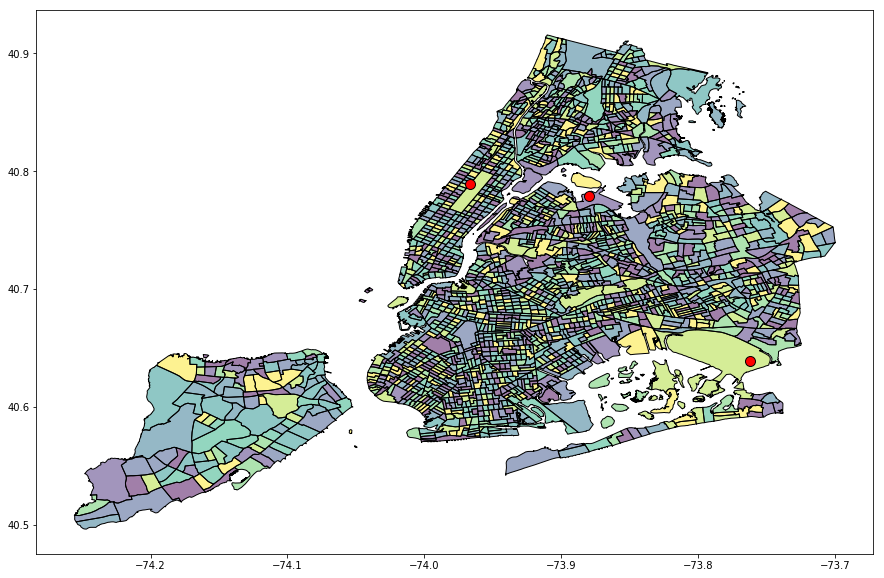

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
tracts.plot(ax=ax)
gg.plot(ax=ax, marker='o', color='red', 
        markeredgecolor='black', markersize=10)

In [13]:
import shapely.ops as sops

In [14]:
distances = tracts.apply(lambda row:  
                         gg['geometry'].distance(row['geometry'].centroid),
                         axis=1)

In [15]:
distances

0         1         2
0     0.186991  0.244783  0.320677
1     0.033124  0.090843  0.236631
2     0.031137  0.093648  0.240762
3     0.030428  0.096498  0.244230
4     0.030114  0.099395  0.247702
5     0.040053  0.110601  0.253818
6     0.025420  0.088683  0.240110
7     0.016308  0.084980  0.242924
8     0.015626  0.078277  0.239321
9     0.014779  0.076074  0.239279
10    0.019663  0.100758  0.257474
11    0.019313  0.069158  0.235198
12    0.024353  0.068214  0.243697
13    0.023288  0.071348  0.247118
14    0.019138  0.080876  0.255950
15    0.034155  0.065588  0.244902
16    0.058738  0.082329  0.265659
17    0.061065  0.086401  0.269769
18    0.023370  0.079635  0.256242
19    0.065487  0.086017  0.269439
20    0.064968  0.088748  0.272173
21    0.072380  0.086172  0.269319
22    0.071359  0.087694  0.270944
23    0.077390  0.089771  0.272596
24    0.097148  0.141807  0.239437
25    0.149144  0.188902  0.253937
26    0.103899  0.140040  0.227964
27    0.184260  0.225439  0.277386
28    0.181930  0.220901  0.270693
29    0.178926  0.218334  0.269910
...        ...       ...       ...
2136  0.094869  0.154293  0.264267
2137  0.096689  0.150910  0.255676
2138  0.112288  0.058144  0.141687
2139  0.105654  0.060314  0.148956
2140  0.242378  0.156616  0.090795
2141  0.244736  0.158590  0.095559
2142  0.101638  0.048229  0.152383
2143  0.105421  0.052234  0.148535
2144  0.209532  0.257068  0.310255
2145  0.208599  0.258167  0.314894
2146  0.213971  0.260265  0.310176
2147  0.219684  0.270180  0.325472
2148  0.256256  0.176301  0.046165
2149  0.252747  0.173206  0.043683
2150  0.262449  0.181825  0.051020
2151  0.262423  0.183185  0.042741
2152  0.097847  0.137774  0.232047
2153  0.095973  0.133495  0.227724
2154  0.118506  0.117980  0.294631
2155  0.130681  0.129113  0.303775
2156  0.261630  0.204952  0.054054
2157  0.264907  0.204242  0.041609
2158  0.272110  0.213044  0.050839
2159  0.269322  0.210023  0.048537
2160  0.240399  0.308015  0.391028
2161  0.247215  0.314012  0.394228
2162  0.237432  0.226692  0.178252
2163  0.239332  0.217614  0.150052
2164  0.286548  0.340448  0.387949
2165  0.281009  0.337828  0.392098

[2166 rows x 3 columns]

In [16]:
import numpy as np
stationID = np.argmin(distances.values,axis=1)

In [17]:
stationID

array([0, 0, 0, ..., 2, 0, 0])

In [18]:
gg['geometry']

0              POINT (-73.9669 40.7889)
1                POINT (-73.88 40.7792)
2    POINT (-73.76220000000001 40.6386)
Name: geometry, dtype: object

In [19]:
tracts['station'] = gg.iloc[stationID]['name'].values

In [20]:
tracts[tracts['boro_name'].str.match("Queens")]

boro_code boro_ct201 boro_name cdeligibil  ct2010 ctlabel  \
405          4    4000200    Queens          E  000200       2   
406          4    4001000    Queens          I  001000      10   
407          4    4001400    Queens          I  001400      14   
408          4    4001600    Queens          E  001600      16   
409          4    4002800    Queens          I  002800      28   
410          4    4003100    Queens          I  003100      31   
411          4    4003800    Queens          I  003800      38   
412          4    4003900    Queens          I  003900      39   
413          4    4004001    Queens          E  004001   40.01   
414          4    4005100    Queens          I  005100      51   
415          4    4006502    Queens          E  006502   65.02   
416          4    4007300    Queens          I  007300      73   
417          4    4007900    Queens          E  007900      79   
418          4    4009400    Queens          E  009400      94   
419          4    4010200    Queens          E  010200     102   
420          4    4010400    Queens          E  010400     104   
421          4    4010600    Queens          I  010600     106   
422          4    4011100    Queens          I  011100     111   
423          4    4011200    Queens          I  011200     112   
424          4    4011300    Queens          E  011300     113   
425          4    4011400    Queens          I  011400     114   
426          4    4011500    Queens          E  011500     115   
427          4    4011600    Queens          E  011600     116   
428          4    4011700    Queens          I  011700     117   
429          4    4011900    Queens          E  011900     119   
430          4    4012100    Queens          E  012100     121   
431          4    4012400    Queens          E  012400     124   
432          4    4012601    Queens          E  012601  126.01   
433          4    4012602    Queens          I  012602  126.02   
434          4    4012800    Queens          I  012800     128   
...        ...        ...       ...        ...     ...     ...   
2037         4    4069000    Queens          I  069000     690   
2042         4    4008700    Queens          E  008700      87   
2043         4    4009100    Queens          E  009100      91   
2049         4    4125700    Queens          I  125700    1257   
2050         4    4126500    Queens          I  126500    1265   
2056         4    4068300    Queens          I  068300     683   
2057         4    4071702    Queens          I  071702  717.02   
2079         4    4017100    Queens          I  017100     171   
2090         4    4017900    Queens          I  017900     179   
2094         4    4098100    Queens          I  098100     981   
2098         4    4047500    Queens          E  047500     475   
2099         4    4068700    Queens          I  068700     687   
2134         4    4038100    Queens          E  038100     381   
2135         4    4038302    Queens          I  038302  383.02   
2138         4    4066300    Queens          I  066300     663   
2139         4    4066501    Queens          I  066501  665.01   
2140         4    4056200    Queens          I  056200     562   
2141         4    4162100    Queens          I  162100    1621   
2142         4    4049900    Queens          E  049900     499   
2143         4    4050700    Queens          I  050700     507   
2148         4    4061800    Queens          I  061800     618   
2149         4    4063200    Queens          I  063200     632   
2150         4    4061602    Queens          I  061602  616.02   
2151         4    4063800    Queens          I  063800     638   
2156         4    4096400    Queens          I  096400     964   
2157         4    4097203    Queens          E  097203  972.03   
2158         4    4097202    Queens          E  097202  972.02   
2159         4    4097204    Queens          E  097204  972.04   
2162         4    4091601    Queens          

In [21]:
cols = ['boro_ct201', 'boro_name', 'ct2010','ntacode','ntaname', 'station']
tracts[cols].to_csv("tracts_with_nearest_stations.csv", index=False)

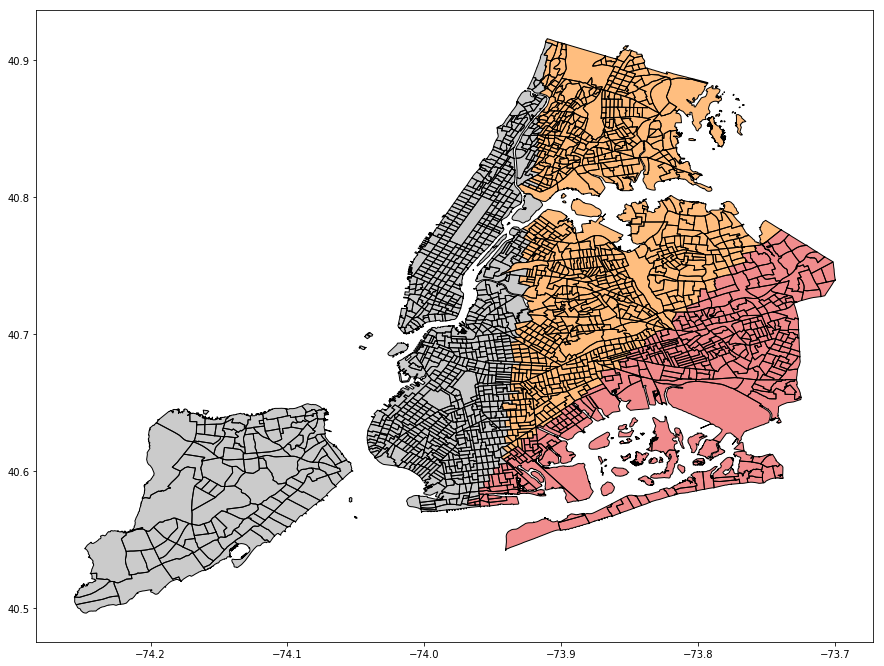

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
tracts.plot('station', ax=ax)
ax.set_aspect('equal')

In [29]:
tracts['min_distance'] = distances.min(axis=1)

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
tracts.plot('min_distance', ax=ax)
gg.plot(ax=ax, marker='o', color='red', 
        markeredgecolor='black', markersize=10)
ax.set_aspect('equal')
sm = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

NameError: name 'tracts' is not defined